λ (Price impact): 0.884
β (Insider intensity): 0.566
Mean squared error between price and value: 0.2430


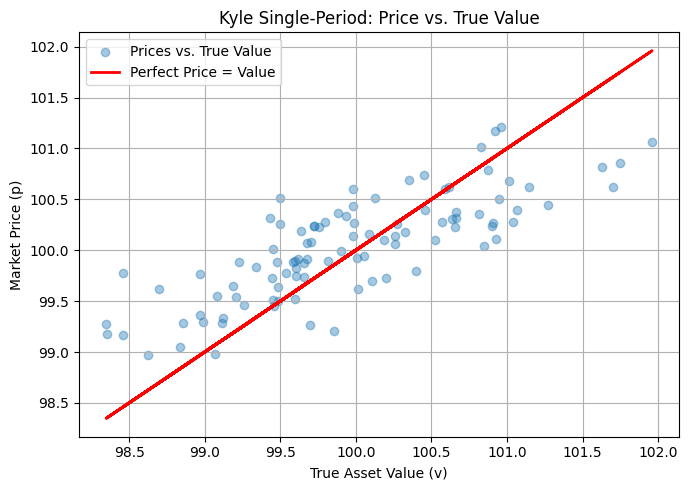

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# initial parameters
Sigma0 = 0.5        # Prior variance of v
sigma_u = 0.4       # Std. dev. of noise trader demand
p0 = 100            # Prior mean of asset value
n = 100            # Number of simulated trades

# Kyle equilibrium
lambda_kyle = np.sqrt(Sigma0) / (2 * sigma_u)
beta_kyle = sigma_u / np.sqrt(Sigma0)

# Simulating true asset values and noise
v = np.random.normal(loc=p0, scale=np.sqrt(Sigma0), size=n)
u = np.random.normal(loc=0, scale=sigma_u, size=n)

# Insider order
x = beta_kyle * (v - p0)

# Total order flow
y = x + u

# Market price
p = p0 + lambda_kyle * y

# === Analysis ===
# Price error
error = p - v
mse = np.mean(error**2)

print(f"λ (Price impact): {lambda_kyle:.3f}")
print(f"β (Insider intensity): {beta_kyle:.3f}")
print(f"Mean squared error between price and value: {mse:.4f}")

# === Plot ===

plt.figure(figsize=(7, 5))
plt.scatter(v, p, alpha=0.4, label="Prices vs. True Value")
plt.plot(v, v, color='red', label="Perfect Price = Value", linewidth=2)
plt.xlabel("True Asset Value (v)")
plt.ylabel("Market Price (p)")
plt.title("Kyle Single-Period: Price vs. True Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


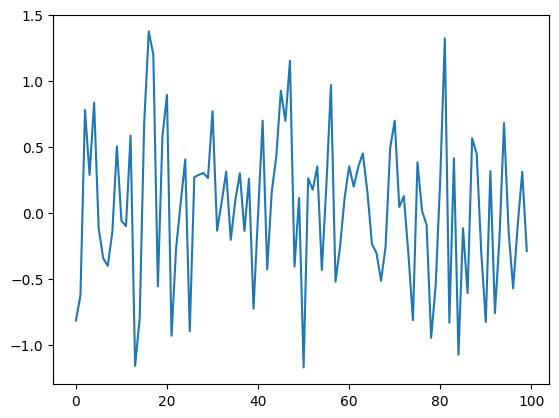

In [2]:
# plot of simulated omega
plt.plot(y)

Kyle Model Simulation Results (Fixed Lambda):
   Total Order Flow (omega)   Price (p)
0                 -0.813634   99.280843
1                 -0.624539   99.447980
2                  0.780204  100.689610
3                  0.288579  100.255070
4                  0.835020  100.738061


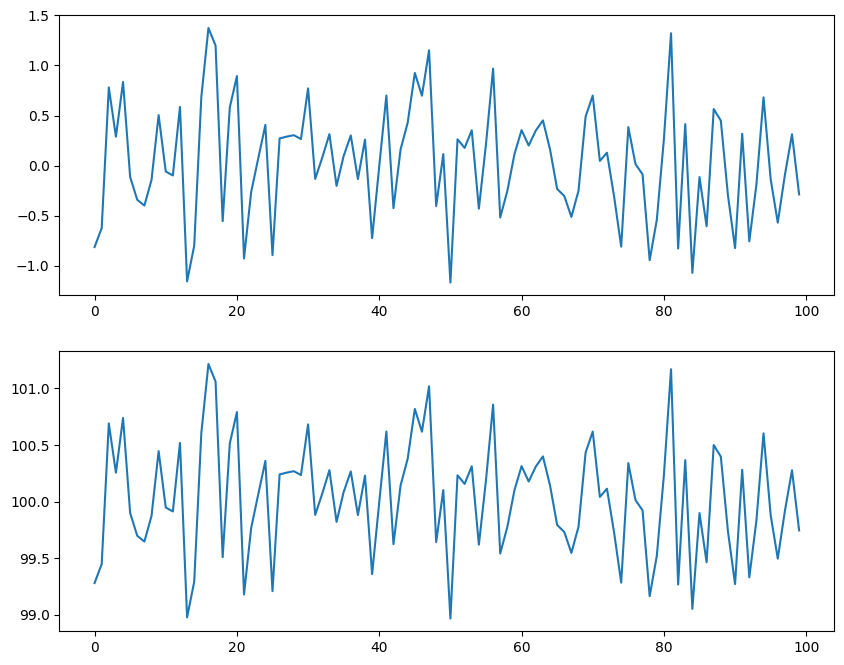

In [3]:
# price and total order flow
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(y)
axes[1].plot(p)

results_kyle = pd.DataFrame({
    'Total Order Flow (omega)': y,
    'Price (p)': p
})
print("Kyle Model Simulation Results (Fixed Lambda):")
print(results_kyle.head())

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/var/folders/xx/h26qxyld2fb7n13d0cvby8ww0000gn/T/ipykernel_70683/2867614936.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Total Order Flow ($\omega$)')
/var/folders/xx/h26qxyld2fb7n13d0cvby8ww0000gn/T/ipykernel_70683/2867614936.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Kyle Model: Price vs. Order Flow ($\lambda = {lambda_kyle}$)')
/var/folders/xx/h26qxyld2fb7n13d0cvby8ww0000gn/T/ipykernel_70683/2867614936.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(omega_range, price_line, color='green', label='Pricing Rule: p = $\mu + \lambda \omega$')


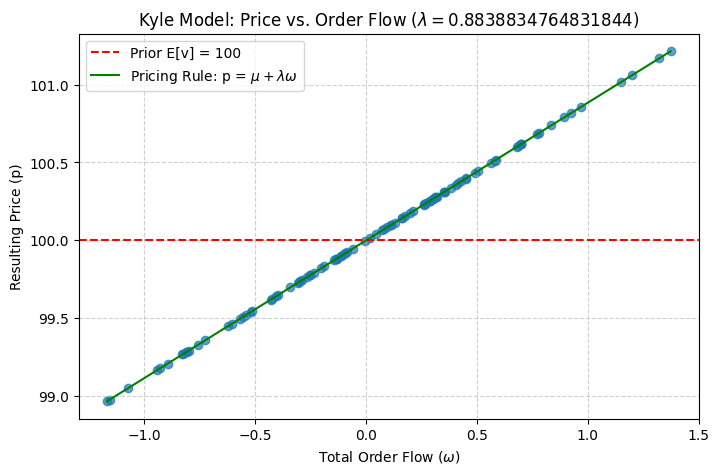

In [4]:
# price and total order flow
plt.figure(figsize=(8, 5))
plt.scatter(results_kyle['Total Order Flow (omega)'], results_kyle['Price (p)'], alpha=0.7)
plt.axhline(p0, color='red', linestyle='--', label=f'Prior E[v] = {p0}')
plt.xlabel('Total Order Flow ($\omega$)')
plt.ylabel('Resulting Price (p)')
plt.title(f'Kyle Model: Price vs. Order Flow ($\lambda = {lambda_kyle}$)')
# Plot the pricing rule line
omega_range = np.linspace(results_kyle['Total Order Flow (omega)'].min(), results_kyle['Total Order Flow (omega)'].max(), 50)
price_line = p0 + lambda_kyle * omega_range
plt.plot(omega_range, price_line, color='green', label='Pricing Rule: p = $\mu + \lambda \omega$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

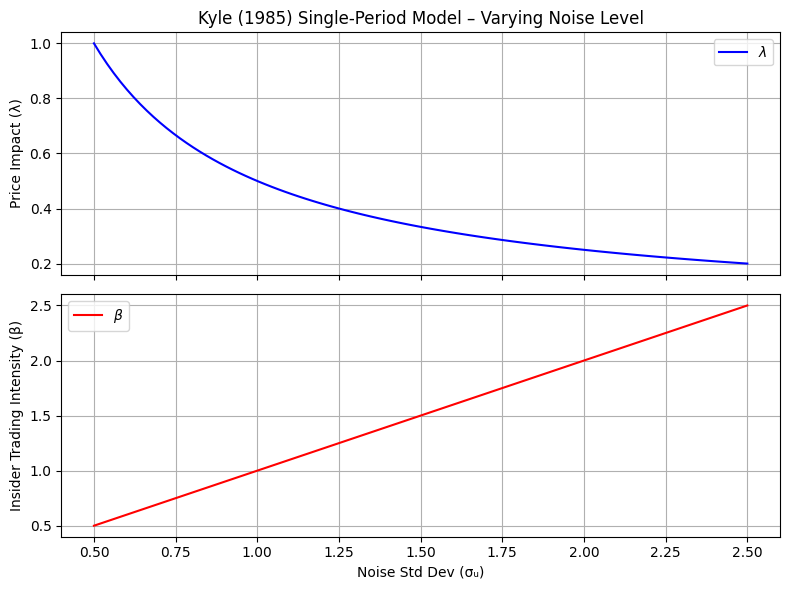

In [5]:
### Evolution of lambda and beta with noise level (single-period)
### Fixed Σ₀ = 1

Sigma0 = 1.0
sigma_u_values = np.linspace(0.5, 2.5, 100)

# Compute lambda and beta for each sigma_u
lambda_vals = np.sqrt(Sigma0) / (2 * sigma_u_values)
beta_vals = sigma_u_values / np.sqrt(Sigma0)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# λ vs σ
axs[0].plot(sigma_u_values, lambda_vals, color='blue', label=r'$\lambda$')
axs[0].set_ylabel('Price Impact (λ)')
axs[0].grid(True)
axs[0].legend()
axs[0].set_title('Kyle (1985) Single-Period Model – Varying Noise Level')

# β vs σ
axs[1].plot(sigma_u_values, beta_vals, color='red', label=r'$\beta$')
axs[1].set_ylabel('Insider Trading Intensity (β)')
axs[1].set_xlabel('Noise Std Dev (σᵤ)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


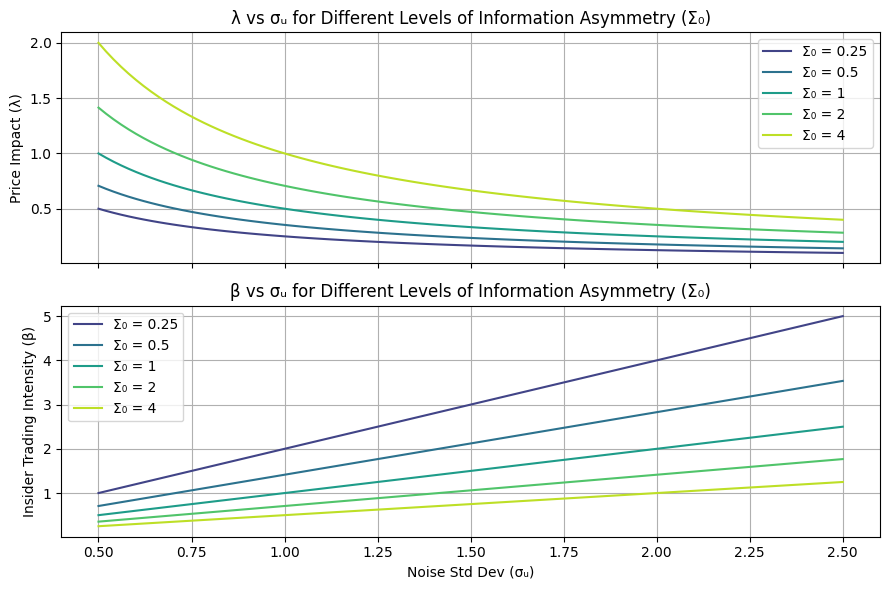

In [6]:
### Varying Σ₀ and σ_u
# Range of σ_u values (noise levels)
sigma_u_vals = np.linspace(0.5, 2.5, 100)

# Varying Σ₀ (info asymmetry levels)
Sigma0_vals = [0.25, 0.5, 1, 2, 4]
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(Sigma0_vals)))

# subplots
fig, axs = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# λ plots
for i, Sigma0 in enumerate(Sigma0_vals):
    lambda_vals = np.sqrt(Sigma0) / (2 * sigma_u_vals)
    axs[0].plot(sigma_u_vals, lambda_vals, label=f"Σ₀ = {Sigma0}", color=colors[i])

axs[0].set_ylabel("Price Impact (λ)")
axs[0].set_title("λ vs σᵤ for Different Levels of Information Asymmetry (Σ₀)")
axs[0].legend()
axs[0].grid(True)

# β plots
for i, Sigma0 in enumerate(Sigma0_vals):
    beta_vals = sigma_u_vals / np.sqrt(Sigma0)
    axs[1].plot(sigma_u_vals, beta_vals, label=f"Σ₀ = {Sigma0}", color=colors[i])

axs[1].set_ylabel("Insider Trading Intensity (β)")
axs[1].set_xlabel("Noise Std Dev (σᵤ)")
axs[1].set_title("β vs σᵤ for Different Levels of Information Asymmetry (Σ₀)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
